In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data

In [2]:
import cv2

In [3]:
astro = data.astronaut()

#y 축을 30,  x 축으로 100

astro_gray = cv2.cvtColor(astro, cv2.COLOR_RGB2GRAY)

(-0.5, 511.5, 511.5, -0.5)

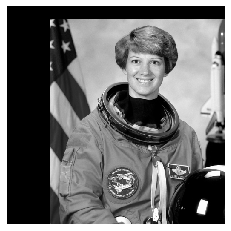

In [3]:
rows,cols = astro_gray.shape

Mat = np.float32([[1,0,100],
                [0,1,30]])

dst = cv2.warpAffine(astro_gray,Mat,(cols,rows))

plt.imshow(dst,cmap="gray")
plt.axis("off")

In [23]:
def custom_rotate (img ,angle):
    rows,cols = img.shape
    Mat = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(img,Mat,(cols,rows))
    return dst

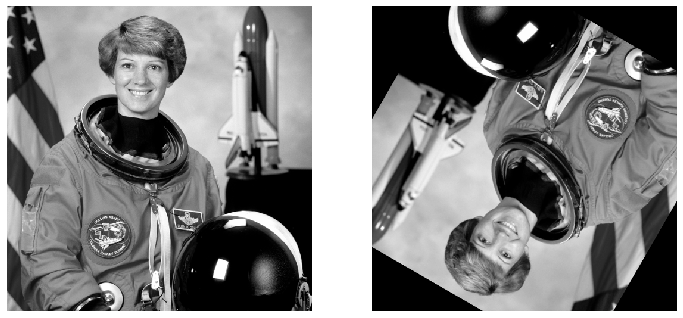

In [31]:
astro = data.astronaut()

astro_gray = cv2.cvtColor(astro, cv2.COLOR_RGB2GRAY)

astro_rot = custom_rotate(astro_gray,150)

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(astro_gray, cmap='gray'), plt.axis('off')
plt.subplot(122); plt.imshow(astro_rot, cmap='gray'), plt.axis('off')
plt.show()

In [6]:
def img_resize_NN (img, scale):
    height,width = img.shape[:2]
    dsize = (height*scale, width*scale)
    resize_img = cv2.resize(img, None,fx = 1*scale, fy=1*scale, interpolation = cv2.INTER_NEAREST)
    #resize_img = cv2.resize(img, dsize, interpolation = cv2.INTER_NEAREST)
    return resize_img

def img_resize_C (img, scale):
    height,width = img.shape[:2]
    dsize = (height*scale, width*scale)
    resize_img = cv2.resize(img, None,fx = 1*scale, fy=1*scale, interpolation = cv2.INTER_CUBIC)
#     resize_img = cv2.resize(img, dsize, interpolation = cv2.INTER_CUBIC)
    return resize_img

In [9]:
astro_resize_NN = img_resize_NN(astro_gray,2)
astro_resize_cubic = img_resize_C(astro_gray,2)

cv2.imshow("cubic_img",astro_resize_cubic)
cv2.imshow("nn_img",astro_resize_NN)

cv2.waitKey()
cv2.destroyAllWindows()
# plt.figure(figsize=(12,12))
# plt.subplot(121); plt.imshow(astro_gray, cmap='gray'), plt.axis('off')
# plt.subplot(122); plt.imshow(astro_resize, cmap='gray'), plt.axis('off')
# plt.show()